Locally Weighted Linear Regression (LWR) is effective for **nonlinear relationships where local trends are meaningful**.

This notebook demonstrates the LWR algorithm on a toy dataset. This expands upon the brief coverage of this topic in Andrew Ng's CS229 lecture [notes](http://cs229.stanford.edu/main_notes.pdf), Section 1.4.

Here’s a demonstration of **Locally Weighted Linear Regression (LWR)** on a synthetic dataset:

### **Dataset & Model**
- The dataset consists of **100 points** sampled from a **sine wave** with some added noise.
- Standard **linear regression** would fail to capture the nonlinear pattern, so we use **LWR** instead.
- The LWR model assigns weights to training points based on their proximity to the **query point**.
- The **bandwidth parameter $\tau = 0.5$ controls how "local" the fit is.



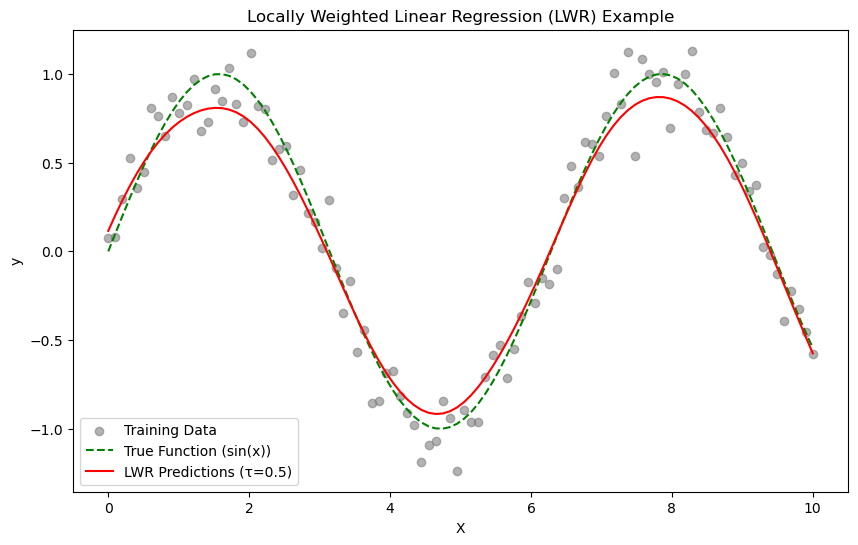

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.spatial.distance import cdist

# Generate synthetic dataset
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.15, X.shape[0])  # Sine wave with noise

# Define Locally Weighted Linear Regression (LWR) function
def locally_weighted_regression(X_train, y_train, X_query, tau=0.5):
    """
    Perform Locally Weighted Linear Regression (LWR) for a given query point X_query.
    Uses weighted least squares where weights decrease with distance from X_query.
    
    Parameters:
    X_train (ndarray): Training data features.
    y_train (ndarray): Training data target values.
    X_query (ndarray): Point where prediction is made.
    tau (float): Bandwidth parameter controlling locality (lower values -> more local).
    
    Returns:
    y_pred (float): Predicted value at X_query.
    """
    m = X_train.shape[0]  # Number of training examples
    W = np.exp(-cdist(X_train, X_query.reshape(1, -1))**2 / (2 * tau**2))  # Compute weights
    W = np.diag(W.flatten())  # Convert to diagonal matrix
    
    # Solve weighted least squares: θ = (X^T W X)^(-1) X^T W y
    X_aug = np.hstack((np.ones((m, 1)), X_train))  # Add bias term
    X_query_aug = np.hstack((np.ones((1, 1)), X_query.reshape(1, -1)))  # Query point with bias
    
    theta = np.linalg.inv(X_aug.T @ W @ X_aug) @ (X_aug.T @ W @ y_train)  # Compute parameters
    y_pred = X_query_aug @ theta  # Make prediction
    
    return y_pred.item()

# Apply LWR to multiple query points
X_queries = np.linspace(0, 10, 100).reshape(-1, 1)
y_preds = np.array([locally_weighted_regression(X, y, x_query, tau=0.5) for x_query in X_queries])

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', alpha=0.6, label="Training Data")
plt.plot(X_queries, np.sin(X_queries), 'g--', label="True Function (sin(x))")
plt.plot(X_queries, y_preds, 'r-', label="LWR Predictions (τ=0.5)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Locally Weighted Linear Regression (LWR) Example")
plt.show()

### **Plot Interpretation**
- **Gray points**: Training data (noisy sine wave).
- **Green dashed line**: True underlying function $\sin(x)$.
- **Red curve**: Predictions from LWR.
  - Notice how LWR successfully follows the local shape of the function _without assuming global linearity_.